# Assignment 3: Classification with Logistic Regression

## Instructions

* Complete the assignment as outlined below.
* Restart your kernel and rerun your cells before submission.
* Submit your completed notebook (.ipynb).

## Dataset Information

The dataset contains health-related data for predicting diabetes. Below are the features:

* `Pregnancies`: Number of pregnancies
* `Glucose`: Plasma glucose concentration
* `BloodPressure`: Diastolic blood pressure (mm Hg)
* `SkinThickness`: Triceps skin fold thickness (mm)
* `Insulin`: 2-hour serum insulin (mu U/ml)
* `BMI`: Body mass index
* `DiabetesPedigreeFunction`: Diabetes pedigree function
* `Age`: Age (years)
* `Outcome`: Target variable (1 = Diabetes, 0 = No Diabetes)

Your goal in this homework is to train a first model for predicting the probability that a patient has diabetes given their healthcare data.

In [ ]:
# Suggested packages, you can add more if you think they are necessary.
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline

# Plotting packages
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Download the data.
!gdown https://drive.google.com/uc?id=1-_YcEl0q5LsDXRq5eix9K4gjSq78Ffd5

Downloading...
From: https://drive.google.com/uc?id=1-_YcEl0q5LsDXRq5eix9K4gjSq78Ffd5
To: C:\Users\Sahab\Downloads\diabetes.csv

  0%|          | 0.00/23.1k [00:00<?, ?B/s]
100%|##########| 23.1k/23.1k [00:00<00:00, 817kB/s]


## Question 1:

1. Load the dataset `diabetes.csv` and display the first 5 rows.
2. Print out all columns in the dataset and identify any missing values.
3. Show the descriptive statistics of the data.

In [ ]:
# Load the dataset
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Report number of null values
print(f'There are {data.isnull().sum().sum()} null values in the dataset.')

There are 0 null values in the dataset.


In [ ]:
# Show descriptive statistics
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


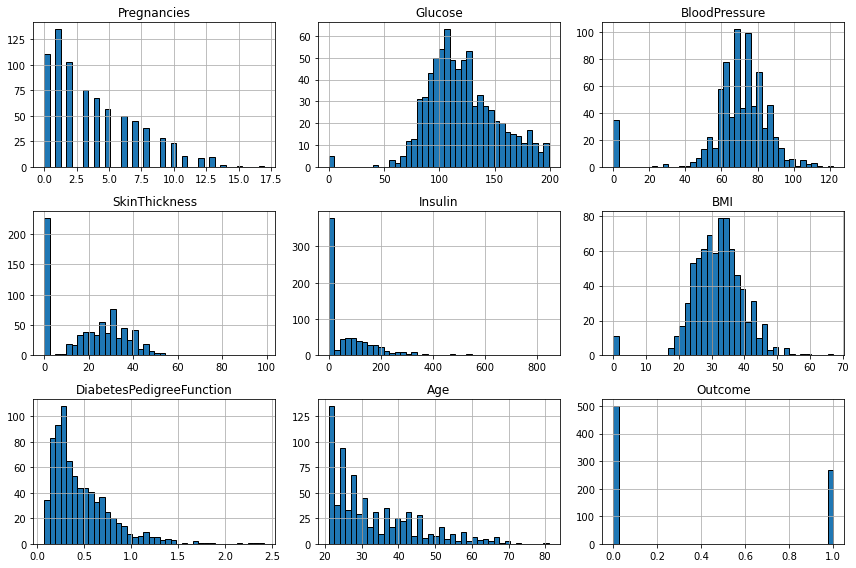

In [ ]:
# Visualize histograms of the columns
data.hist(figsize = (12, 8), bins = 40, edgecolor = 'black')
plt.tight_layout()
plt.show()

In [ ]:
# Check the data where both BloodPressure and BMI are zero!
data[(data['BloodPressure'] == 0) & (data['BMI'] == 0)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
81,2,74,0,0,0,0.0,0.102,22,0
426,0,94,0,0,0,0.0,0.256,25,0
494,3,80,0,0,0,0.0,0.174,22,0
522,6,114,0,0,0,0.0,0.189,26,0
706,10,115,0,0,0,0.0,0.261,30,1


In [ ]:
# BloodPressure, BMI, and Glucose cannot assume zero values!
data.loc[data['BloodPressure'] == 0, 'BloodPressure'] = data['BloodPressure'].median()
data.loc[data['BMI'] == 0, 'BMI'] = data['BMI'].median()
data.loc[data['Glucose'] == 0, 'Glucose'] = data['Glucose'].median()

## Question 2:

What is the baseline accuracy for this classification problem? Baseline accuracy is the accuracy of always predicting the most common class. You can assume there are no outliers in the data.

In [ ]:
# Question 2 code
data['Outcome'].value_counts(normalize = True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

## Question 3:

Split the data into training and testing sets. Use 70% of the data for training and 30% for testing. Pass `random_state = 42` to `train_test_split`. Ensure the `Outcome` column is the response variable. Report the descriptive statistics of X_train and X_test.

In [ ]:
# Question 3 code
X = data.drop('Outcome', axis = 1)
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Show the descriptive stats
print('X_train:')
print(X_train.describe())
print('\nX_test:')
print(X_test.describe())

X_train:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   537.000000  537.000000     537.000000     537.000000  537.000000   
mean      3.726257  121.938547      72.232775      20.432030   79.836127   
std       3.262965   30.142292      12.204867      15.490715  115.196730   
min       0.000000   44.000000      24.000000       0.000000    0.000000   
25%       1.000000  100.000000      64.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   36.000000   
75%       6.000000  139.000000      80.000000      32.000000  129.000000   
max      17.000000  199.000000     122.000000      63.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age  
count  537.000000                537.000000  537.000000  
mean    32.273557                  0.469920   33.074488  
std      6.964647                  0.342087   11.685319  
min     18.200000                  0.078000   21.000000  
25%     27.10000

**Written question: Are the descriptive statistics of the X_train and X_test datasets similar? Is this a reasonable dataset for the problem?**

**Written answer: There are some expected differences between the two datasets, but the differences are relatively minor. The test set is a good one to use.**

## Question 4:

1. Create a pipeline that first standardizes the data using a z-scale transform, and then trains an instance of `LogisticRegression` with `penalty = None` and `max_iter = 1000`. Use the same random seed you used before.
2. Train the pipeline using the training set.

In [ ]:
# Question 4 code
# Create a pipeline that scales the features and trains a logistic regression model
logit_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic_regression', LogisticRegression(solver = 'lbfgs',
                                               penalty = None,
                                               max_iter = 1000,
                                               verbose = 1,
                                               random_state = 42,
                                               n_jobs = -1,
                                               class_weight = 'balanced'))
    ])

# Train the pipeline
logit_pipe.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.7s finished


Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic_regression',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    n_jobs=-1, penalty='none', random_state=42,
                                    verbose=1))])

## Question 5:

1. Compute the model’s accuracy on the training and testing sets.
2. Display the model’s coefficients and intercept.

In [ ]:
# Display coefficients
# Get the training parameters in a dataframe with the corresponding feature names
training_params = pd.DataFrame(logit_pipe.named_steps['logistic_regression'].coef_,
                               columns=X_train.columns)

# Get the intercept of the logistic regression model
training_params['intercept'] = logit_pipe.named_steps['logistic_regression'].intercept_
training_params

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,intercept
0,0.224543,1.276142,-0.138096,-0.068759,-0.14798,0.839578,0.176942,0.410692,-0.271637


In [ ]:
# Calculate accuracy
train_accuracy = accuracy_score(y_train, logit_pipe.named_steps['logistic_regression'].predict(X_train))
test_accuracy = accuracy_score(y_test, logit_pipe.named_steps['logistic_regression'].predict(X_test))
print(f'Train Accuracy: {train_accuracy * 100:.3f}%')
print(f'Test Accuracy: {test_accuracy * 100:.3f}%')

Train Accuracy: 35.009%
Test Accuracy: 34.632%


C:\Users\Sahab\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Sahab\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


## Question 6:

1. Plot the ROC curve for the logistic regression model using the testing set. Make sure your plot includes a title and properly labeled axes.
2. Compute the area under the curve (AUC). Report the AUC at the top-left of your plot.

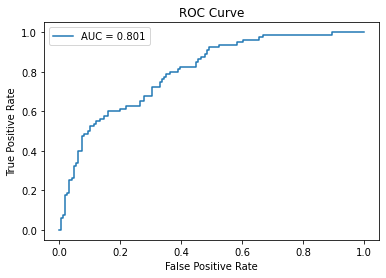

In [ ]:
# Question 6 code
# Compute probabilities
y_prob = logit_pipe.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.plot(fpr, tpr, label = f'AUC = {auc:.3f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**Written question: Comment on the capacity of the model to predict the outcome. Is the AUC acceptable?**

**Written answer: The AUC is close to 0.8, considerably above random prediction.**